# Create recommendation system based on collaborative filtering


### Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous and can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore recommendation systems based on Collaborative Filtering and implement simple version of one using Python and the Pandas library.

![https://th.bing.com/th/id/OIP.E6O_dZOmZhTIJQDYZbJowQHaEK?w=294&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7](https://th.bing.com/th/id/OIP.E6O_dZOmZhTIJQDYZbJowQHaEK?w=294&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Acquiring the Data</a></li>
        <li><a href="#ref2">Importing Libraries</a></li>
        <li><a href="#ref2">Preprocessing</a></li>
        <li><a href="#ref2">EDA</a></li>
        <li><a href="#ref3">Collaborative Filtering</a></li>
    </ol>
</div>
<br>
<hr>

# Acquiring the Data

### To acquire and extract the data, simply follow these steps:  
### Go to [GroupLens](http://grouplens.org/datasets/movielens/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2022-01-01). There you will find all the required datasets related to Movies. Then download the required dataset.
### Or 
### The dataset is available in kaggle too, go to [Kaggle](https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset)
### __Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets.


### Now you're ready to start working with the data!

# Importing Libraries

In [1]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

### Now let's read each file into their Dataframes:


In [2]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('/kaggle/input/movierecommenderdataset/movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('/kaggle/input/movierecommenderdataset/ratings.csv')

### Let's also take a peek at how each of them are organized:


In [3]:
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### So each movie has a unique ID, a title with its release year along with it (Which may contain unicode characters) and several different genres in the same field. Let's remove the year from the title column and place it into its own one by using the handy [extract](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2022-01-01#pandas.Series.str.extract) function that Pandas has.


### Let's remove the year from the __title__ column by using pandas' replace function and store it in a new __year__ column.


In [4]:
#Using regular expressions to find a year stored between parentheses

#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)

#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)

#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')

#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

/tmp/ipykernel_20/3803565386.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')


### Let's look at the result!


In [5]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


### Here's the final movies dataframe:


### Next, let's look at the ratings dataframe.


In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it.


# EDA

# How many movies were released each year

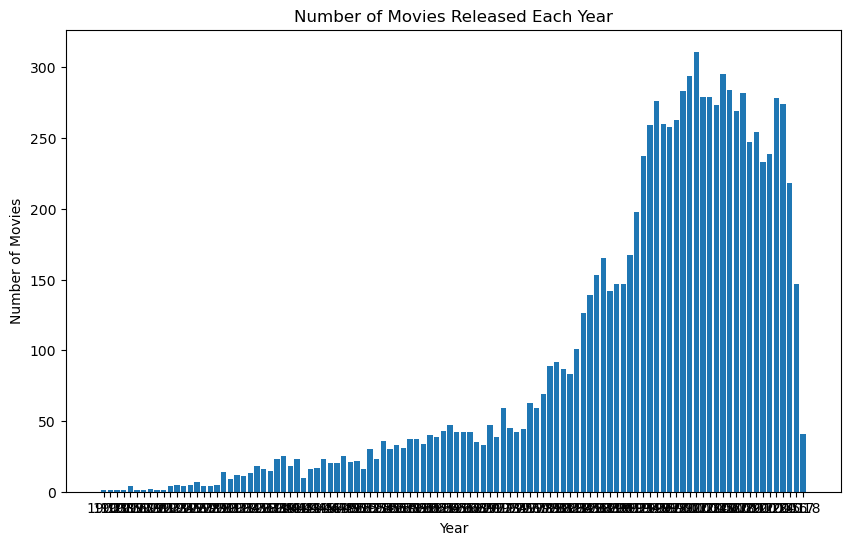

In [7]:
# Group movies by year and count the number of movies
movie_counts = movies_df['year'].value_counts().sort_index()

# Plotting the number of movies released each year
plt.figure(figsize=(10, 6))
plt.bar(movie_counts.index, movie_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

# Difference of Years Between Release Date of the Movie and the Date Rating Was Given

### To do this first let's merge the both datasets

In [8]:
# Merge movies and ratings dataset based on the movieid column
merged_data = movies_df.merge(ratings_df, on='movieId')
merged_data.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


### Now we have merged both ratings and movies, let's calculate the year difference

In [9]:
# Convert release year and timestamp columns to datetime data type
merged_data['release_date'] = pd.to_datetime(merged_data['year'], format='%Y')
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='s')

# Calculate the year difference between release date and rating date
merged_data['year_difference'] = (merged_data['timestamp'].dt.year - merged_data['release_date'].dt.year)

# Print the year difference for each movie rating
print(merged_data[['movieId', 'title', 'release_date', 'timestamp', 'year_difference']])

        movieId                               title release_date  \
0             1                           Toy Story   1995-01-01   
1             1                           Toy Story   1995-01-01   
2             1                           Toy Story   1995-01-01   
3             1                           Toy Story   1995-01-01   
4             1                           Toy Story   1995-01-01   
...         ...                                 ...          ...   
100831   193581  Black Butler: Book of the Atlantic   2017-01-01   
100832   193583               No Game No Life: Zero   2017-01-01   
100833   193585                               Flint   2017-01-01   
100834   193587        Bungo Stray Dogs: Dead Apple   2018-01-01   
100835   193609        Andrew Dice Clay: Dice Rules   1991-01-01   

                 timestamp  year_difference  
0      2000-07-30 18:45:03              5.0  
1      1996-11-08 06:36:02              1.0  
2      2005-01-25 06:52:26             10.0  

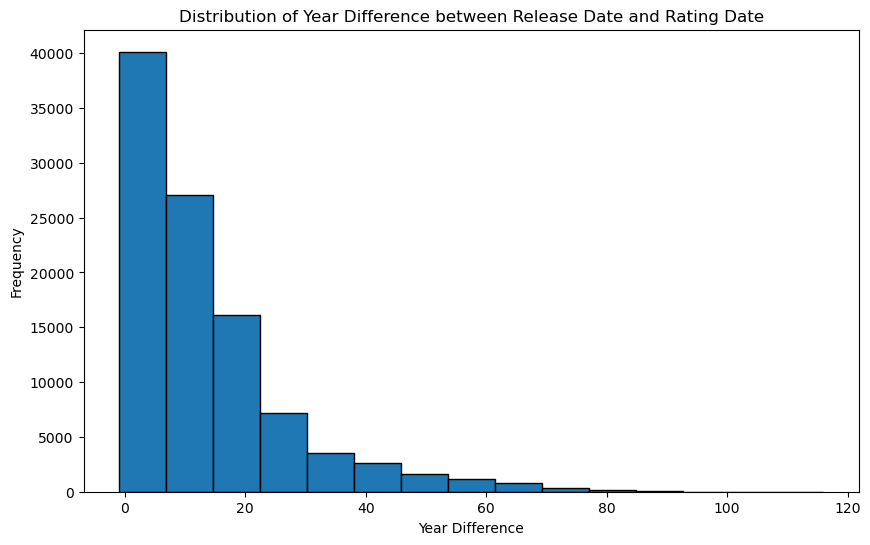

In [10]:
# Plotting the year difference distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_data['year_difference'], bins=15, edgecolor='black')
plt.xlabel('Year Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Year Difference between Release Date and Rating Date')
plt.show()

# Top 10 most rated movies

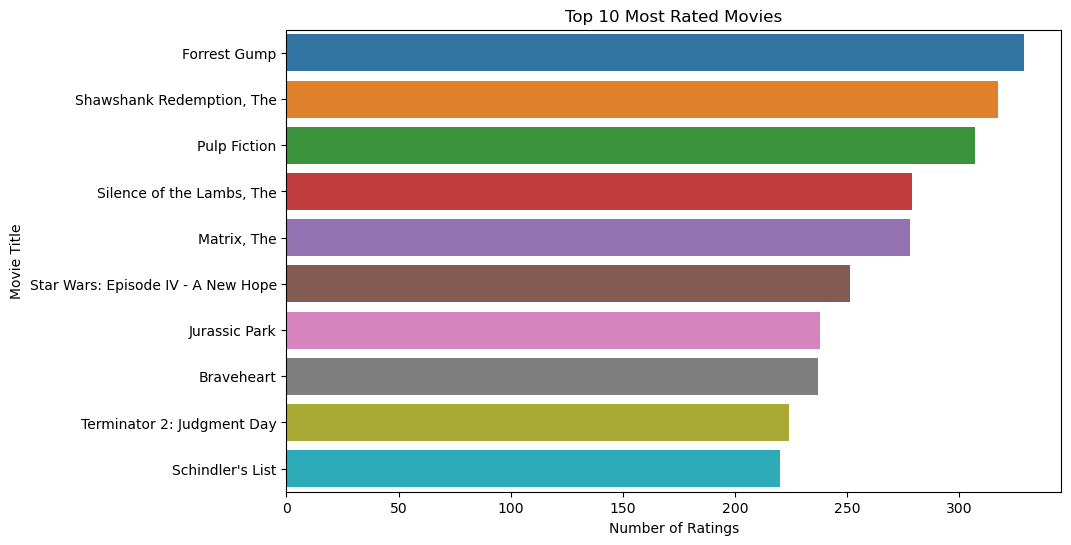

In [11]:
# Count the number of ratings for each movie
movie_ratings = merged_data['title'].value_counts().head(10)

# Plotting the top 10 most rated movies
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_ratings.values, y=movie_ratings.index)
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Rated Movies')
plt.show()


# How are the ratings distributed across all movies

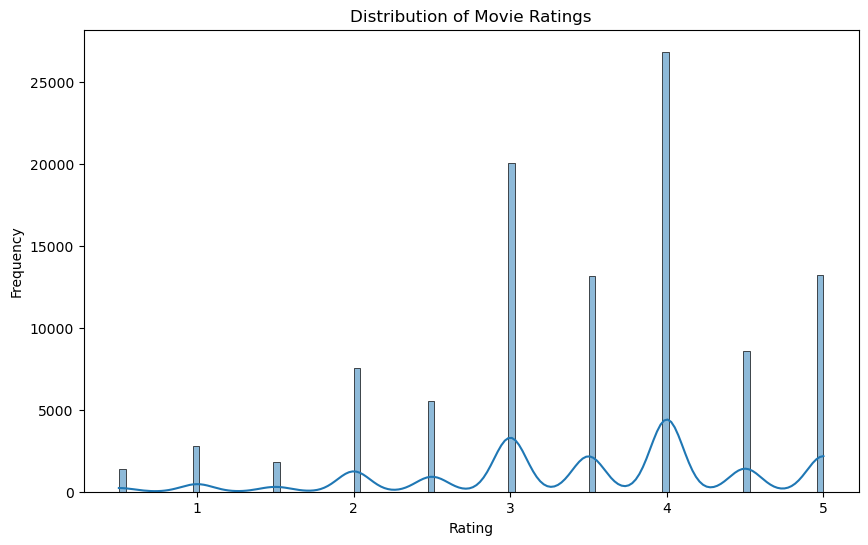

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Distribution of ratings for a specific movie

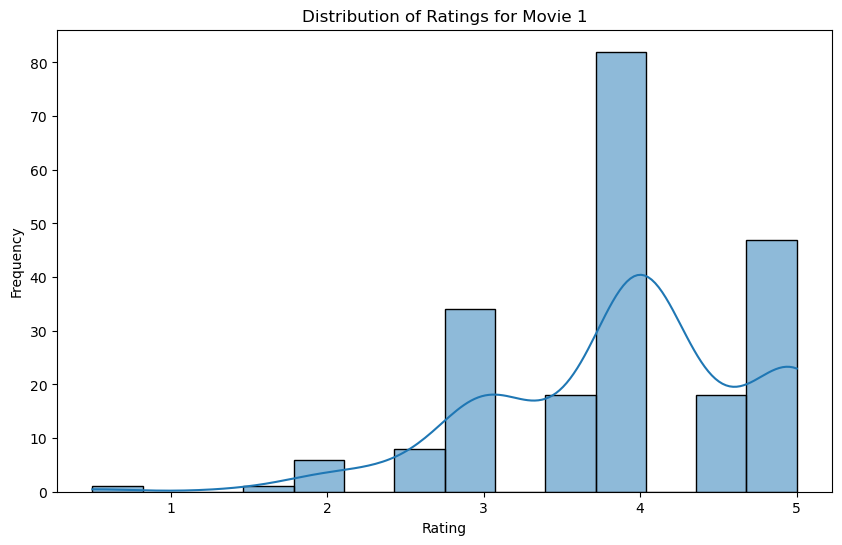

In [13]:
movie_id = 1  # Specify the movie ID for analysis

# Filter ratings data for the specific movie
movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]['rating']

# Plotting the distribution of ratings for the specific movie
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Distribution of Ratings for Movie {movie_id}')
plt.show()


# Average rating for each movie genre

In [14]:
# Average rating for each movie genre
average_rating_by_genre = merged_data.groupby('genres')['rating'].mean()

print(average_rating_by_genre)

genres
(no genres listed)                     3.489362
Action                                 2.935484
Action|Adventure                       3.706306
Action|Adventure|Animation             3.583333
Action|Adventure|Animation|Children    3.410256
                                         ...   
Sci-Fi|Thriller                        3.280172
Sci-Fi|Thriller|IMAX                   3.708333
Thriller                               3.426752
War                                    3.555556
Western                                3.658940
Name: rating, Length: 951, dtype: float64


# Average rating for each year

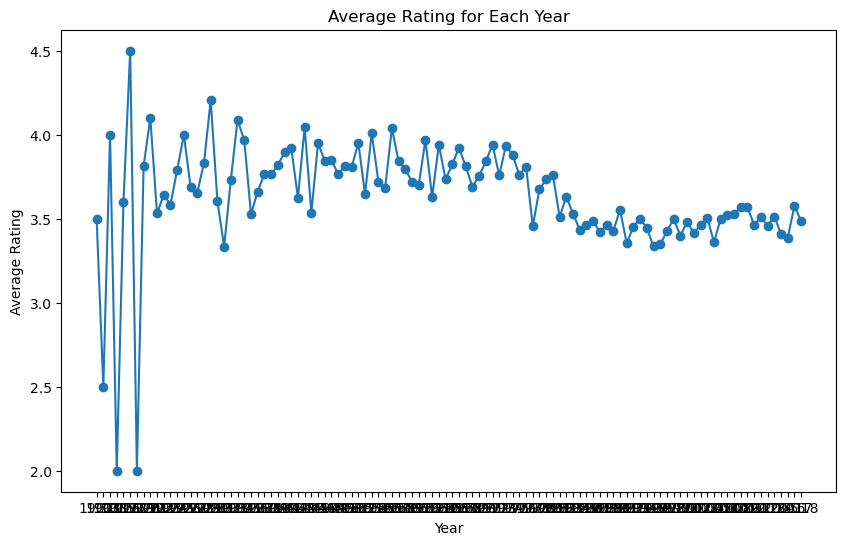

In [15]:
# Calculate the average rating for each year
avg_ratings = merged_data.groupby('year')['rating'].mean()

# Plotting the average rating for each year
plt.figure(figsize=(10, 6))
plt.plot(avg_ratings.index, avg_ratings.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Year')
plt.show()

# Top 10 highest-rated movies

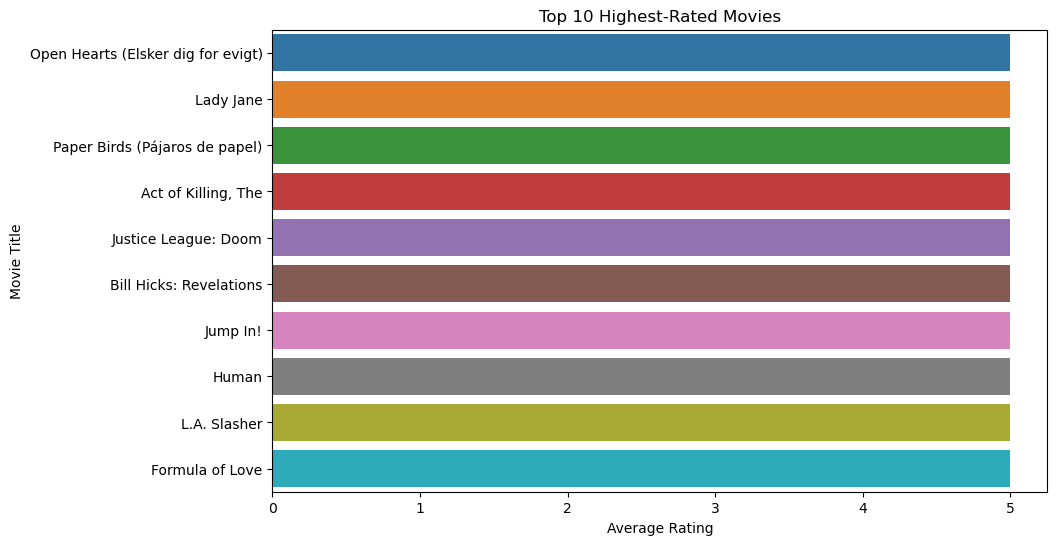

In [16]:
# Calculate the average rating for each movie
avg_ratings = ratings_df.groupby('movieId')['rating'].mean()
avg_ratings = avg_ratings.sort_values(ascending=False).head(10)

# Get the movie titles for the top 10 highest-rated movies
top_rated_movies = movies_df[movies_df['movieId'].isin(avg_ratings.index)]['title']

# Plotting the top 10 highest-rated movies
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=top_rated_movies)
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Rated Movies')
plt.show()


# How many ratings does each user contribute

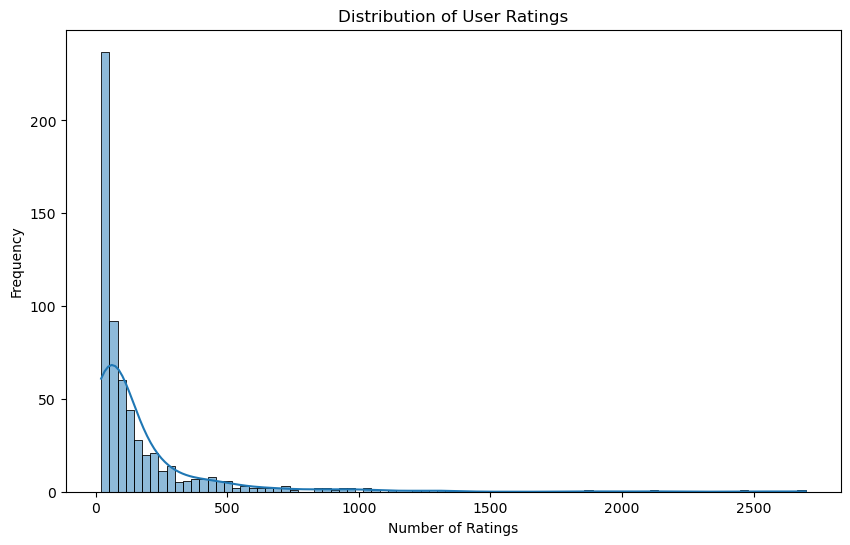

In [17]:
# Count the number of ratings by each user
user_rating_counts = ratings_df['userId'].value_counts()

# Plotting the number of ratings contributed by each user
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, kde=True)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings')
plt.show()

# Ratings distributed for a specific genre

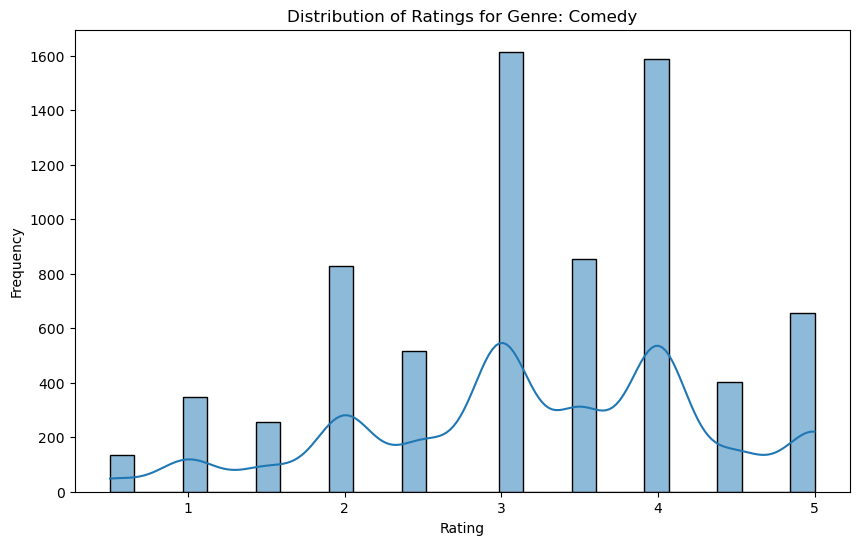

In [18]:
genre = 'Comedy'  # Specify the genre for analysis

# Filter ratings data for the specific genre
genre_ratings = merged_data[merged_data['genres'] == genre]['rating']

# Plotting the distribution of ratings for the specific genre
plt.figure(figsize=(10, 6))
sns.histplot(genre_ratings, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Distribution of Ratings for Genre: {genre}')
plt.show()


# How are the ratings distributed for a specific movie across different user ratings

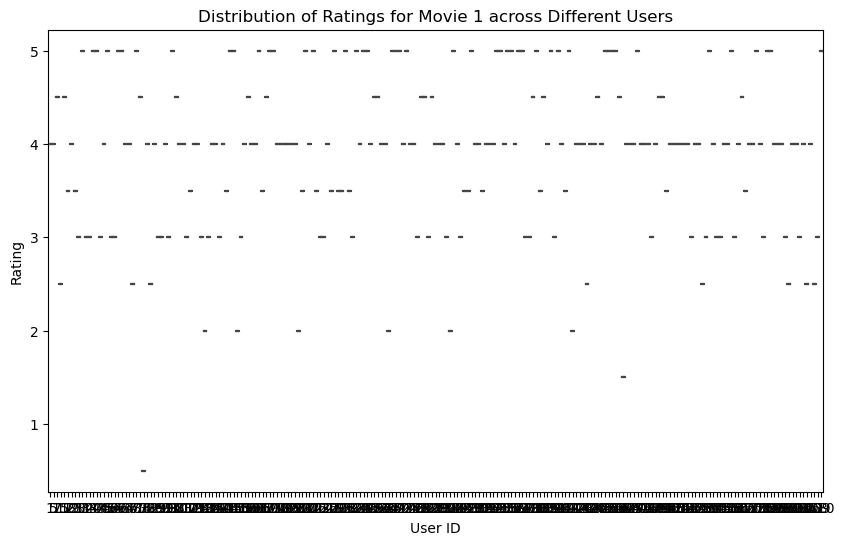

In [19]:
movie_id = 1  # Specify the movie ID for analysis

# Filter ratings data for the specific movie
movie_ratings = merged_data[merged_data['movieId'] == movie_id]

# Plotting the distribution of ratings for the specific movie across different user ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=movie_ratings, x='userId', y='rating')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title(f'Distribution of Ratings for Movie {movie_id} across Different Users')
plt.show()


<hr>

<a id="ref3"></a>
# Collaborative Filtering


### Now it's time to start our work on recommendation systems. 

### The first technique we're going to take a look at is called __Collaborative Filtering__, which is also known as __User-User Filtering__. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the __Pearson Correlation Function__.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width="800px">


### **The process for creating a User Based recommendation system is as follows:**
#### - Select a user with the movies the user has watched
#### - Based on his rating of the movies, find the top X neighbours 
#### - Get the watched movie record of the user for each neighbour
#### - Calculate a similarity score using some formula
#### - Recommend the items with the highest score


### Let's begin by creating an input user to recommend movies to.

### **Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .**


In [20]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


# Add movieId to input user
### With the input complete, let's extract the input movies's ID's from the movies dataframe and add them into it.

### We can achieve this by first filtering out the rows that contain the input movies' title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.


In [21]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

/tmp/ipykernel_20/2035672847.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputMovies = inputMovies.drop('year', 1)


,movieId,title,genres,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.5
1,2,Jumanji,Adventure|Children|Fantasy,2.0
2,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,5.0
3,1274,Akira,Action|Adventure|Animation|Sci-Fi,4.5
4,1968,"Breakfast Club, The",Comedy|Drama,5.0


# The users who has seen the same movies
### Now with the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies in our input.


In [22]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
16,1,296,3.0,964982967
320,4,296,1.0,945173350
422,4,1968,4.0,986934786
516,5,1,4.0,847434962


### We now group up the rows by user ID.


In [23]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])
userSubsetGroup.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
16,1,296,3.0,964982967
320,4,296,1.0,945173350
422,4,1968,4.0,986934786
516,5,1,4.0,847434962
...,...,...,...,...
99510,609,296,4.0,847220802
99534,610,1,5.0,1479542900
99552,610,296,5.0,1479545817
99636,610,1274,5.0,1493846688


### Let's look at one of the users, e.g. the one with userID=600.


In [24]:
# Access the subgroup for userID=600
userSubsetGroup.get_group(600)

,userId,movieId,rating,timestamp
95101,600,1,2.5,1237764347
95102,600,2,4.0,1237764627
95154,600,296,4.5,1237712505
95306,600,1274,3.5,1237709456


### Let's also sort these groups so the users that share the most movies in common with the input have higher priority. This provides a richer recommendation since we won't go through every single user.


In [25]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

/tmp/ipykernel_20/1348096693.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)


### Now let's look at the first user.


In [26]:
userSubsetGroup[0:3]

[(91,
         userId  movieId  rating   timestamp
  14121      91        1     4.0  1112713037
  14122      91        2     3.0  1112713392
  14173      91      296     4.5  1112711264
  14316      91     1274     5.0  1112713057
  14383      91     1968     3.0  1112713409),
 (177,
         userId  movieId  rating   timestamp
  24900     177        1     5.0  1435533535
  24901     177        2     3.5  1435534109
  24930     177      296     5.0  1435530409
  25069     177     1274     2.0  1435535036
  25129     177     1968     3.5  1435534080),
 (219,
         userId  movieId  rating   timestamp
  31524     219        1     3.5  1194681084
  31525     219        2     2.5  1194740185
  31554     219      296     4.0  1198522553
  31628     219     1274     2.5  1194686351
  31680     219     1968     3.0  1194931899)]

# Similarity of users to input user
### Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
### We're going to find out how similar each user is to the input through the __Pearson Correlation Coefficient__. It is used to measure the strength of a linear association between the two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

## **Why Pearson Correlation?**

### Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y, then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because, for example, two users might rate two series of items totally differently in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

### The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

### In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.


### We will select a subset of users to iterate through. This limit is imposed because we don't want to waste too much time going through every single user.


In [27]:
userSubsetGroup = userSubsetGroup[0:100]

### Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the user Id and the value is the coefficient.


In [28]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [29]:
pearsonCorrelationDict.items()

dict_items([(91, 0.43852900965351443), (177, 0.0), (219, 0.45124262819713973), (274, 0.716114874039432), (298, 0.9592712306918567), (414, 0.9376144618769914), (474, 0.11720180773462392), (477, 0.4385290096535153), (480, 0.7844645405527362), (483, 0.08006407690254357), (599, 0.7666866491579839), (608, 0.920736884379251), (50, 0.15713484026367722), (57, -0.7385489458759964), (68, 0.0), (103, 0.5222329678670935), (135, 0.8703882797784892), (182, 0.9428090415820635), (202, 0.5222329678670935), (217, 0.30151134457776363), (226, 0.9438798074485389), (288, 0.6005325641789633), (307, 0.9655810287305759), (318, 0.44486512077567225), (322, 0.5057805388588731), (330, 0.9035942578600878), (357, 0.5606119105813882), (434, 0.9864036607532465), (448, 0.30151134457776363), (469, 0.8164965809277261), (561, 0.5222329678670935), (600, 0.18442777839082938), (606, 0.9146591207600472), (610, -0.47140452079103173), (18, 1.0), (19, -0.5), (21, 0), (45, 0.5000000000000009), (63, -0.4999999999999982), (64, 0.0)

In [30]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.438529,91
1,0.000000,177
2,0.451243,219
3,0.716115,274
4,0.959271,298


# The top x similar users to input user
### Now let's get the top 50 users that are most similar to the input.


In [31]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
43,1.0,132
34,1.0,18
63,1.0,305
82,1.0,489
86,1.0,525


### Now, let's start recommending movies to the input user.

# Rating of selected users to all movies
### We're going to do this by taking the weighted average of the ratings of the movies using the Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our __pearsonDF__ from the ratings dataframe and then store their correlation in a new column called _similarityIndex". This is achieved below by merging of these two tables.


In [32]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp
0,1.0,132,1,2.0,1157921785
1,1.0,132,17,3.0,1157922698
2,1.0,132,29,2.0,1157924165
3,1.0,132,32,3.0,1329983726
4,1.0,132,34,1.5,1157921395


### Now all we need to do is simply multiply the movie rating by its weight (the similarity index), then sum up the new ratings and divide it by the sum of the weights.

### We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

### It shows the idea of all similar users to candidate movies for the input user:


In [33]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp,weightedRating
0,1.0,132,1,2.0,1157921785,2.0
1,1.0,132,17,3.0,1157922698,3.0
2,1.0,132,29,2.0,1157924165,2.0
3,1.0,132,32,3.0,1329983726,3.0
4,1.0,132,34,1.5,1157921395,1.5


In [34]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,36.354096,133.167946
2,31.005292,94.904257
3,8.783859,26.381456
4,0.866025,1.732051
5,7.165336,19.775255


In [35]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.663080,1
2,3.060905,2
3,3.003402,3
4,2.000000,4
5,2.759850,5


# Now let's sort it and see the top 20 movies that the algorithm recommended!


In [36]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
3310,5.0,3310
7579,5.0,7579
905,5.0,905
1211,5.0,1211
140627,5.0,140627
4298,5.0,4298
152711,5.0,152711
633,5.0,633
5537,5.0,5537


In [37]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,genres,year
536,633,Denise Calls Up,Comedy,1995
687,905,It Happened One Night,Comedy|Romance,1934
912,1211,"Wings of Desire (Himmel über Berlin, Der)",Drama|Fantasy|Romance,1987
2484,3310,"Kid, The",Comedy|Drama,1921
3189,4298,Rififi (Du rififi chez les hommes),Crime|Film-Noir|Thriller,1955
3905,5485,Tadpole,Comedy|Drama|Romance,2002
3936,5537,Satin Rouge,Drama|Musical,2002
4969,7579,Pride and Prejudice,Comedy|Drama|Romance,1940
9022,140627,Battle For Sevastopol,Drama|Romance|War,2015
9234,152711,Who Killed Chea Vichea?,Documentary,2010


# Advantages and Disadvantages of Collaborative Filtering

### Advantages
#### * Takes other user's ratings into consideration
#### * Doesn't need to study or extract information from the recommended item
#### * Adapts to the user's interests which might change over time

### Disadvantages
#### * Approximation function can be slow
#### * There might be a low amount of users to approximate
#### * Privacy issues when trying to learn the user's preferences
